# Model Figures

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from neurodsp.sim import sim_combined
from neurodsp.utils import set_random_seed
from neurodsp.spectral import compute_spectrum
from neurodsp.plts import plot_time_series
from neurodsp.utils import create_times
from neurodsp.spectral.utils import trim_spectrum

from fooof import FOOOF, Bands
from fooof.plts.spectra import plot_spectrum, plot_spectrum_shading
from fooof.plts.annotate import plot_annotated_model

In [2]:
import seaborn as sns
sns.set_context('talk')

In [3]:
set_random_seed(505)

## Settings

In [4]:
# Simulation settings
fs = 1000
n_seconds = 100

In [5]:
f_range = [2, 30]

In [6]:
bands = Bands({'delta' : [2, 4],
               'theta' : [4, 8],
               'alpha' : [8, 13],
               'beta' : [13, 30]})

band_colors = {'delta' : '#e8dc35',
               'theta' : '#46b870',
               'alpha' : '#1882d9',
               'beta'  : '#a218d9',
               'gamma' : '#e60026'}

In [7]:
# Notebook settings
SAVE_FIG = False

## Simulate Time Series

In [8]:
comps = {'sim_powerlaw' : {'exponent' : -1.75, 'f_range' : (1.4, 75)}, 
         'sim_bursty_oscillation' : {'freq' : 10, 'leave_burst' : 0.4}}
comp_vars = [1, 1]

In [9]:
times = create_times(n_seconds, fs)
sig = sim_combined(n_seconds, fs, comps, comp_vars)

## Plot Time Series

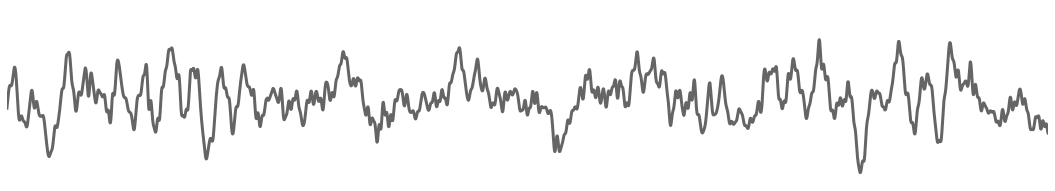

In [10]:
plot_time_series(times, sig, xlim=[1, 5], alpha=0.6, lw=3)
plt.axis('off');
plt.tight_layout()
if SAVE_FIG:
    plt.savefig('time_series.pdf')

### Plot Power Spectrum

In [11]:
freqs, pows = compute_spectrum(sig, fs, nperseg=1.5*fs)
freqs, pows = trim_spectrum(freqs, pows, f_range)

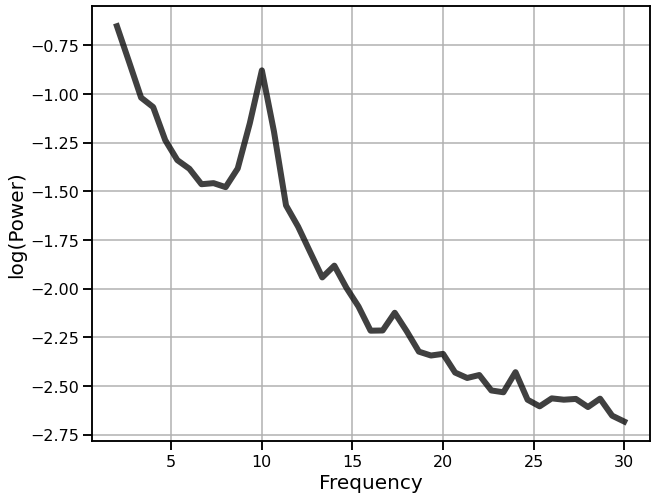

In [12]:
plot_spectrum(freqs, pows, color='black', alpha=0.75, lw=6, log_powers=True)
if SAVE_FIG:
    plt.savefig('spectrum.pdf')

### Freq-by-Freq

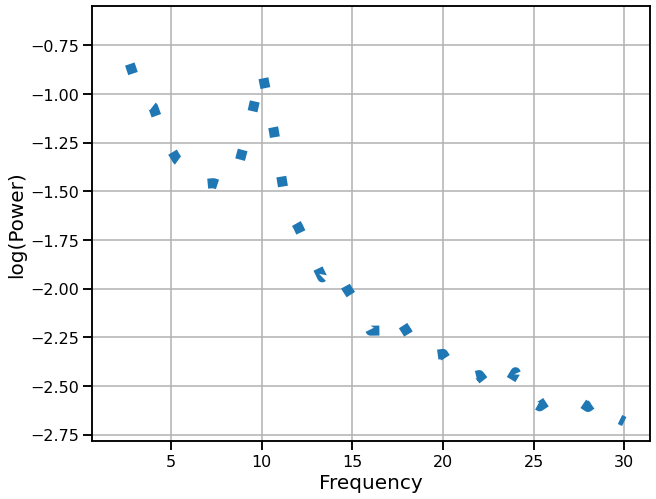

In [13]:
plot_spectrum(freqs, pows, ls=(1, (1, 4)), lw=10, log_powers=True)
if SAVE_FIG:
    plt.savefig('spectrum-freqs.pdf')

### Band-by-Band

In [14]:
shades = {'alpha' : [7, 14]}

(2.0, 30.0)

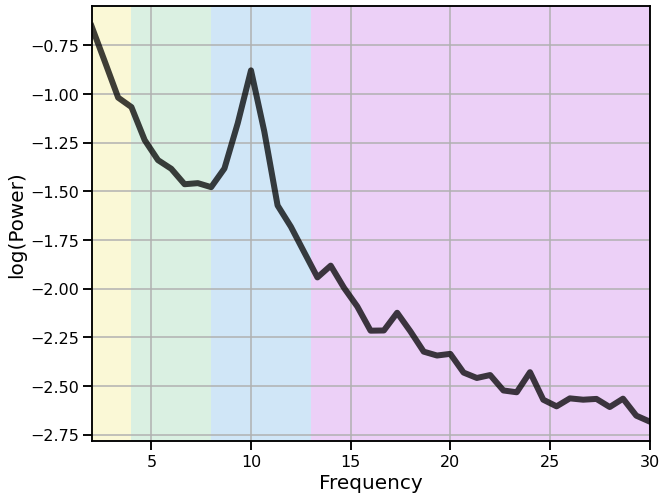

In [15]:
plot_spectrum_shading(freqs, pows, bands.definitions, list(band_colors.values()),
                      color='black', alpha=0.75, lw=6, log_powers=True)
plt.gca().set_xlim([2, 30])

### FOOOF 

In [16]:
fm = FOOOF(verbose=False, max_n_peaks=1)

In [17]:
fm.fit(freqs, pows)

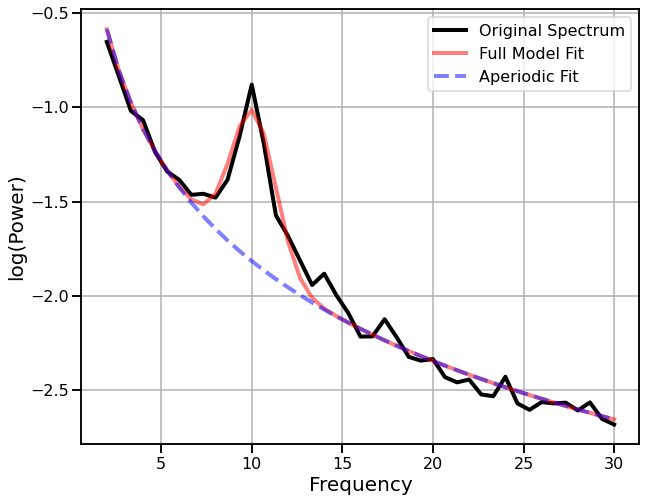

In [18]:
fm.plot(data_kwargs={'lw' : 4}, aperiodic_kwargs={'lw' : 4}, model_kwargs={'lw' : 4},
        save_fig=SAVE_FIG, file_name='fooof.pdf')

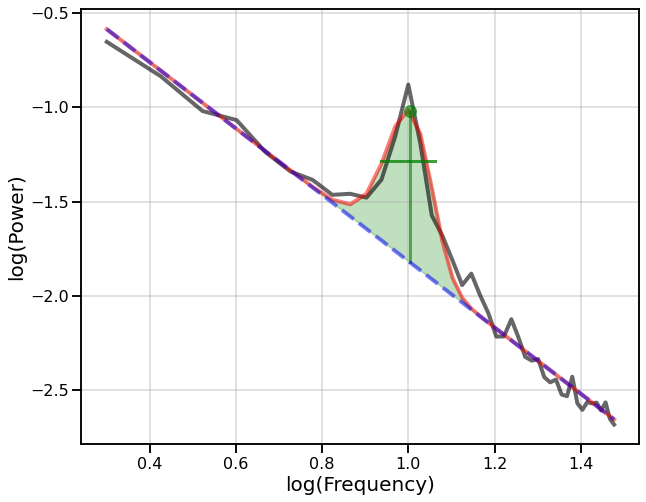

In [19]:
_, ax = plt.subplots(figsize=(10, 8))
plot_annotated_model(fm, plt_log=True, annotate_peaks=False, annotate_aperiodic=False, ax=ax)
ax.legend().remove()
if SAVE_FIG:
    plt.savefig('model_fit.svg', dpi=300)

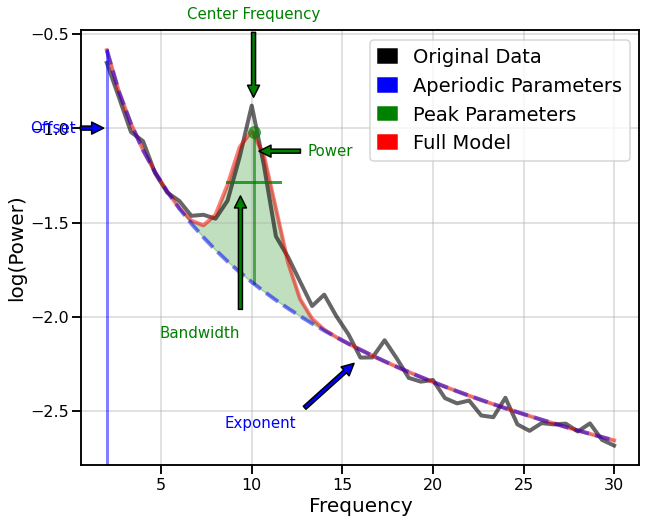

In [20]:
with sns.plotting_context('talk', font_scale=0.75):
    plot_annotated_model(fm)

### Model Components

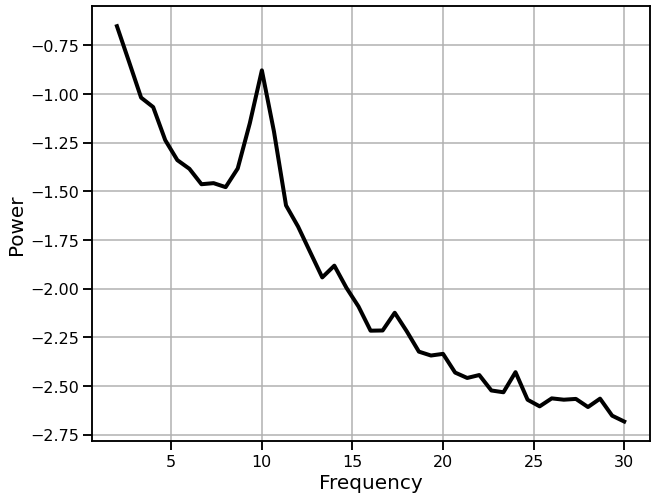

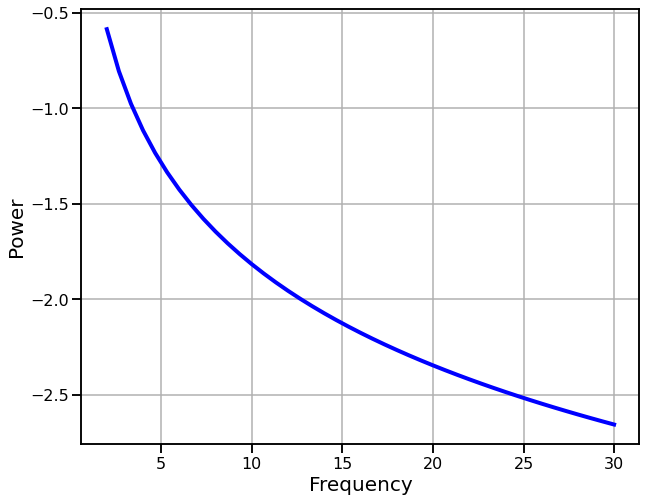

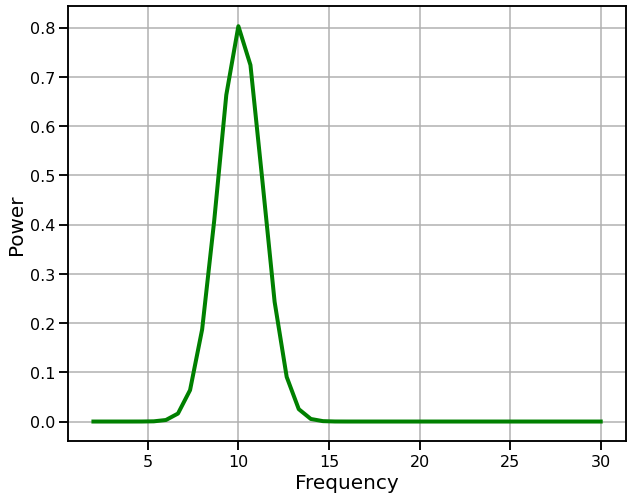

In [21]:
plot_spectrum(freqs, fm.power_spectrum, lw=4, color='black')
if SAVE_FIG:
    plt.savefig('a1-psd.pdf', bbox_inches='tight')
plot_spectrum(freqs, fm._ap_fit, lw=4, color='blue')
if SAVE_FIG:
    plt.savefig('a2-psd.pdf', bbox_inches='tight')
plot_spectrum(freqs, fm._peak_fit, lw=4, color='green')
if SAVE_FIG:
    plt.savefig('a3-psd.pdf', bbox_inches='tight')